In [77]:
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [78]:
(a,b),(c,d) = cifar10.load_data()
print(a.shape,c.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


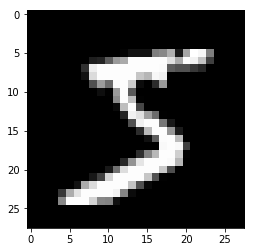

In [79]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0].reshape(28,28),cmap="gray")
print(X_train.shape,X_test.shape)
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000,784).astype('float32')
print(X_train.shape,X_test.shape)

In [80]:
print(X_train[0])
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
print(X_train[0])

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    3.   18.   18.   18.
  126.  136.  175.   26.  166.  255.  247.  127.   

In [81]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print(num_classes)

10


In [82]:
model = Sequential()
model.add(Dense(512,activation="relu",input_shape=(784,)))
model.add(Dense(10,activation="softmax"))

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [85]:
model.fit(X_train, y_train,epochs=10, batch_size=200)

Epoch 1/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.3011 - acc: 0.9162
Epoch 2/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.1258 - acc: 0.9645
Epoch 3/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0836 - acc: 0.9756
Epoch 4/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0610 - acc: 0.9827
Epoch 5/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0451 - acc: 0.9869
Epoch 6/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0351 - acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0270 - acc: 0.9924
Epoch 8/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0209 - acc: 0.9946
Epoch 9/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0164 - acc: 0.9962
Epoch 10/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0131 - a

In [86]:
loss,accuracy = model.evaluate(X_test,y_test)
print(loss,accuracy)

10000/10000 [==============================] - 1s 70us/step
0.0608151813159 0.9811


2726
[2] [[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]]


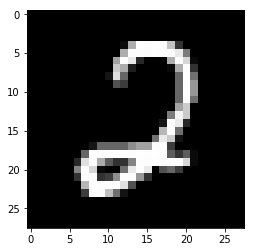

In [90]:
import random
rand = random.randint(1,10000)
print(rand)
prediction_real=model.predict_classes(X_test[rand:rand+1])
print(prediction_real,y_test[rand:rand+1])
plt.imshow(X_test[rand:rand+1].reshape(28,28),cmap="gray")